# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
%matplotlib inline

base = pd.read_csv('Mod07Ex01.csv')
base.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0


In [2]:
base.isna().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher      

In [3]:
base.dtypes #verificando dummy

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_F                                      int64
sexo_M                                      int64
posse_de_veiculo_N                          int64
posse_de_veiculo_Y                          int64
posse_de_imovel_N                           int64
posse_de_imovel_Y                           int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64


In [4]:
base.mau = base.mau.astype(int) # transformando bool em int

In [5]:
base.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [6]:
# Separando as variáveis. Cada uma dessas partes terá dois objetos, um armazenando
# a variável resposta mau e outro armazenando as variáveis explicativas
y = base.mau
x = base.drop('mau',axis=1)

In [7]:
#  70% da base para treinamento e 30% para validação
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [8]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

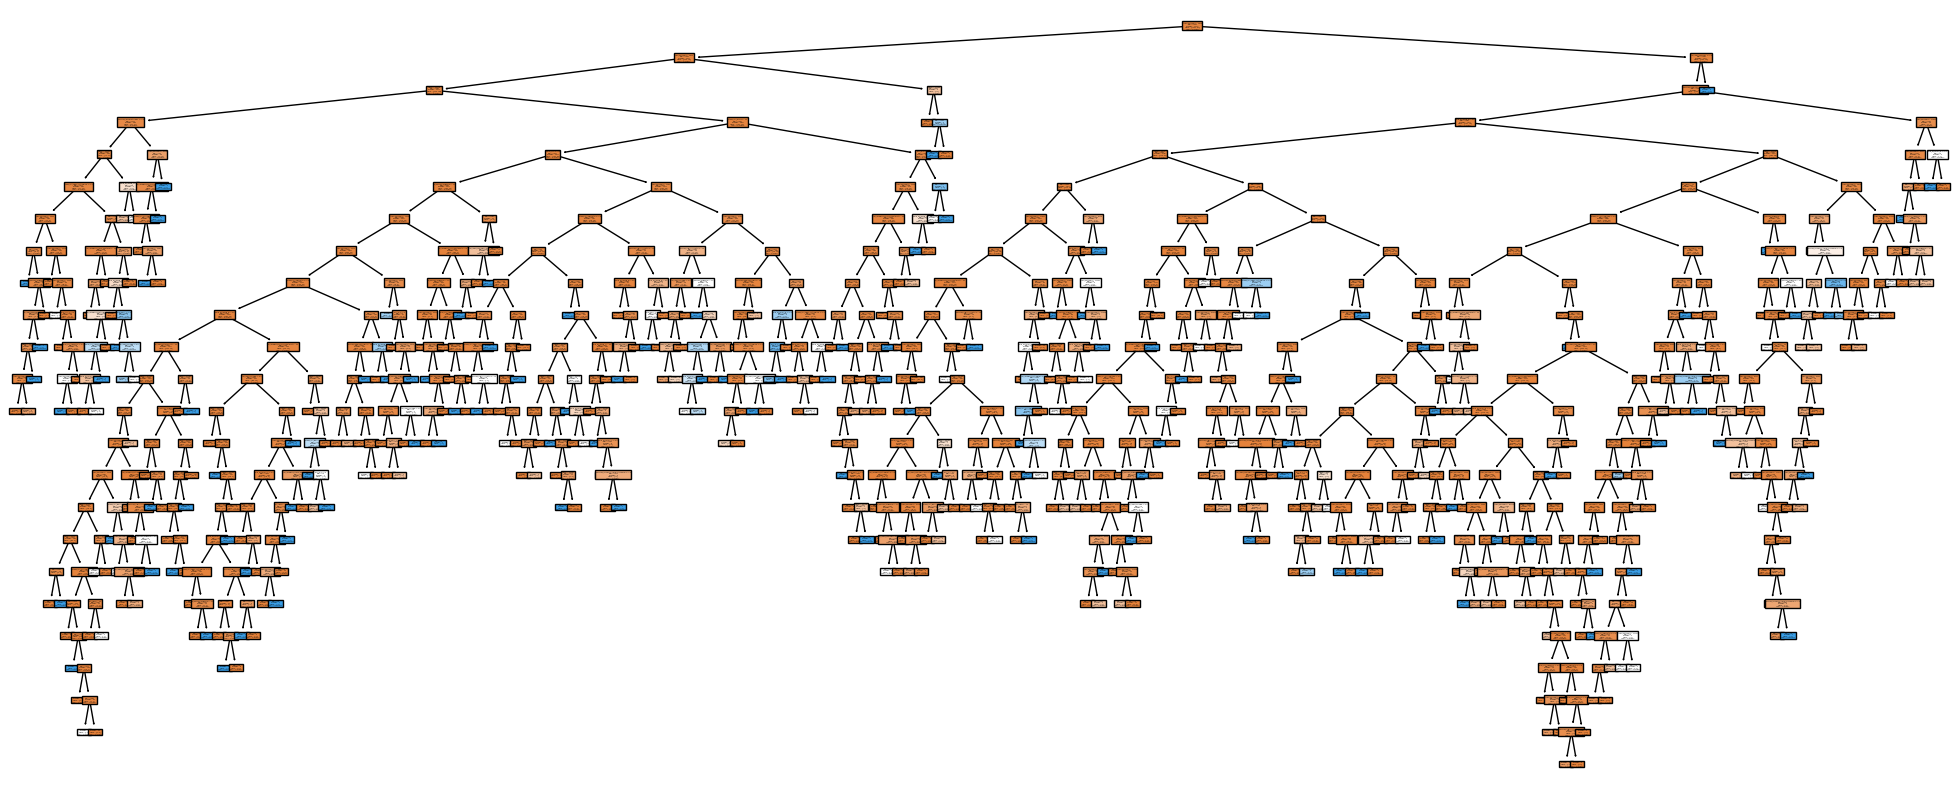

In [9]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x.columns);

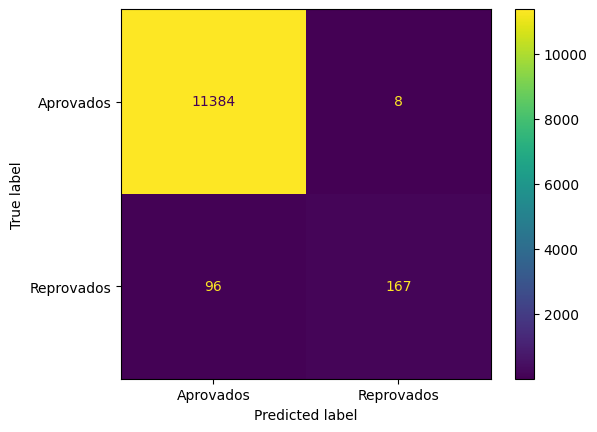

In [10]:
#plot_confusion_matrix(clf, x_test, y_test, display_labels=['Died', 'Survived']);
ConfusionMatrixDisplay.from_estimator(clf, x_train,y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [11]:
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

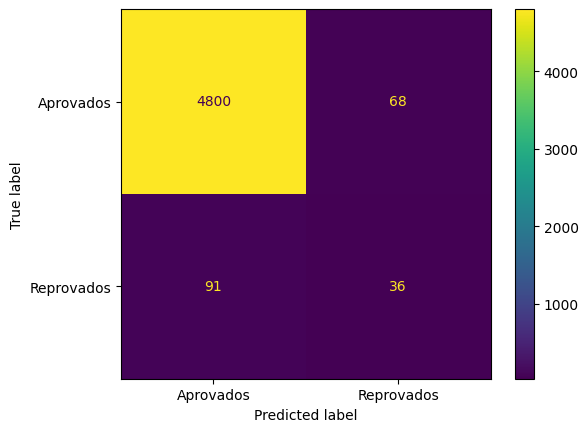

In [12]:
ConfusionMatrixDisplay.from_estimator(clf, x_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [13]:
predict = clf.predict(x_test)
accuracy_score(y_test, predict)
# Ao comparar treino (99.1%) e teste (96.8%), é notada uma diferença de
# aproximadamente 2.3%, onde ambas estão com valores proximos de 100%,
# sendo ótimos em seus resultados.
# Dessa forma, sendo validadas para uso.

0.9681681681681682

In [14]:
clf_nova = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_nova = clf_nova.fit(x_train,y_train)
predict = clf_nova.predict(x_test)
accuracy_score(y_test, predict)

0.9727727727727727

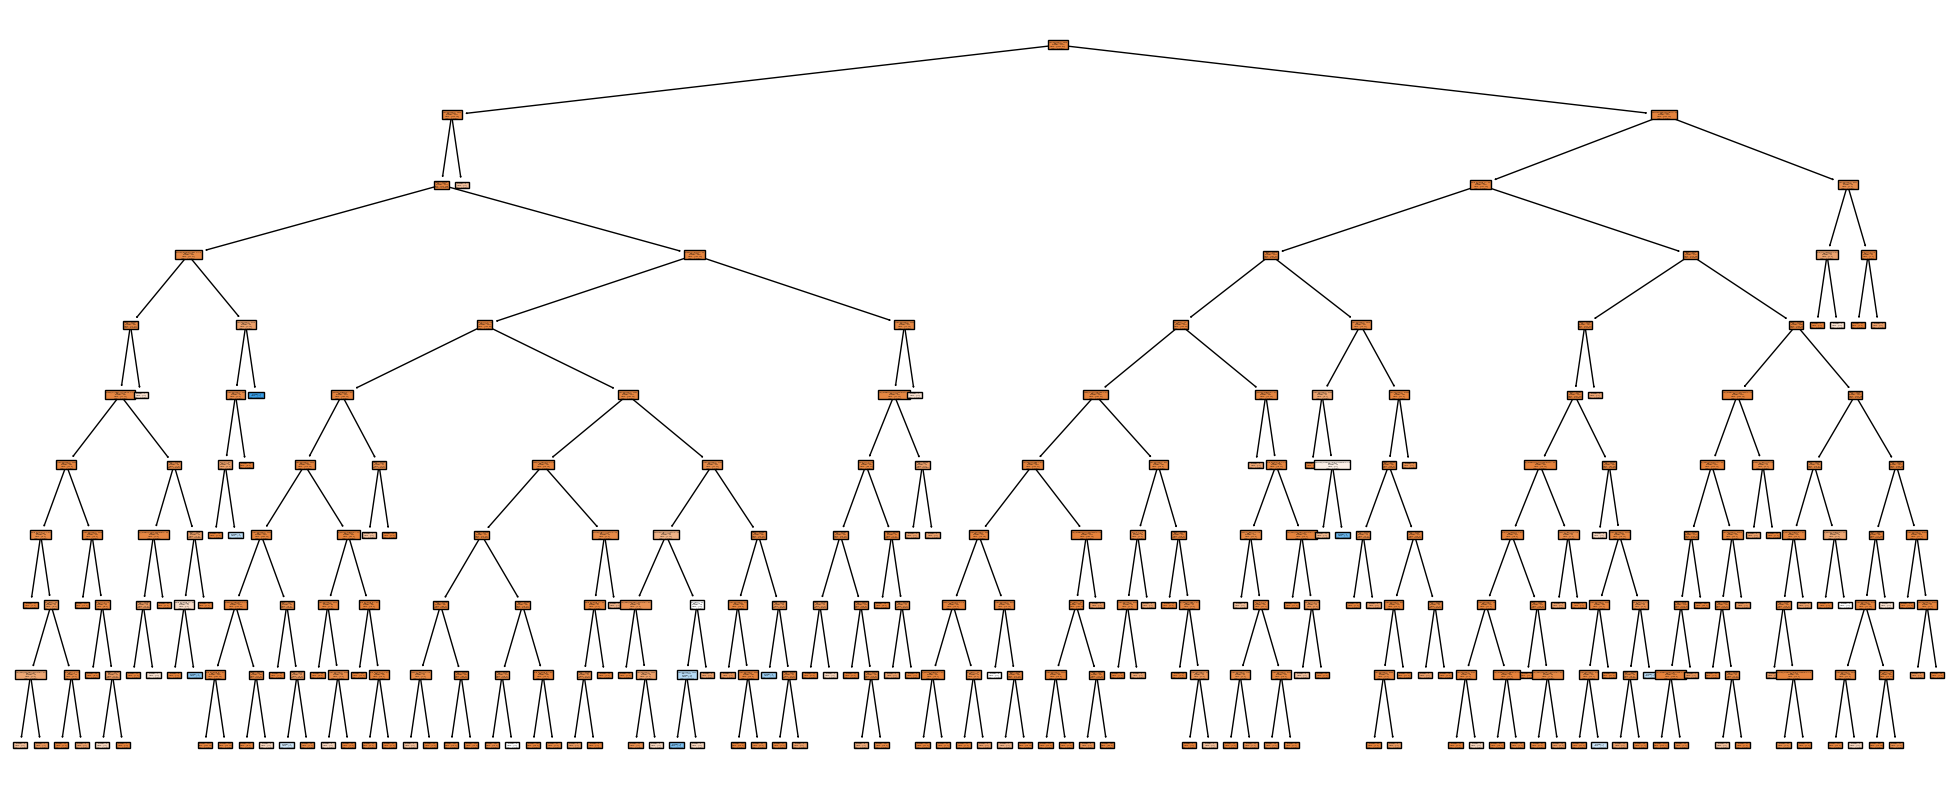

In [15]:
plt.figure(figsize=(25, 10))
plot_tree(clf_nova,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=x.columns);

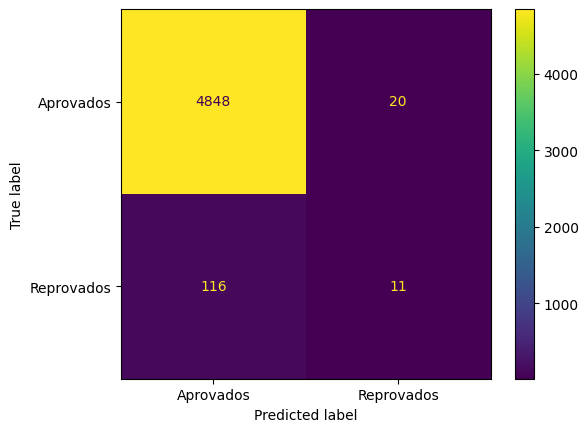

In [16]:
ConfusionMatrixDisplay.from_estimator(clf_nova, x_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [17]:
# Ao classificar todos os contratos como 'bons'
base2 = base
base2.mau = base2.mau.replace(1, 0)
base2.mau.value_counts()

0    16650
Name: mau, dtype: int64

In [18]:
y = base2.mau
x = base2.drop('mau',axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [20]:
clf2 = DecisionTreeClassifier(random_state=100)
clf2 = clf2.fit(x_train,y_train)

In [21]:
# A acuracia esta em 100%, o que significa que nem sempre uma acuracia alta é um
# bom sinal, pois ao ter apenas valores iguais, teremos sempre 100% de acerto.
# Deste modo é necessário sempre olhar os valores e verifica-los antes de
# decidir se um dado é valido ou não.
predict = clf2.predict(x_test)
accuracy_score(y_test, predict)

1.0